# Juan Esteban Pineda Lopera.
## C.C 1001248691

1. Se usa el método de las ecuaciones diferenciales, ya que el método de la función de transferencia asume que estas siempre son igual a cero, pero en este caso se tienen condiciones iniciales para el flujo de aire.

$P(t) \times R = R \frac{d^2v(t)}{dt^2} + \frac{1}{E}\frac{dv(t)}{dt} + v(t)$

donde la Presión es: $ P(t) = 1.3 \sin{(2 \pi f t)}$

2. Se organiza como si fuera una ecuación de primer orden a través de cambios de variable:

$v_1 (t) = v(t) → \text{Volumen}$

$v_2 (t) = \dot{v_1}(t) = \dot{v} (t) → \text{Flujo de aire}$

$\dot{v_2} (t) = \ddot{v} (t)$

$P(t) \times R = R \dot{v_2}(t) + \frac{1}{E} v_2 (t) + v_1 (t)$

$\dot{v_2}(t) = \frac{R P(t) - \frac{1}{E}v_2 (t) - v_1 (t)}{R}$

Esta última será la ecuación que se simulará en el código.

In [23]:
# Se importan las librerias necesarias
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [24]:
# Funcion para definir el sistema de ecuaciones a resolver.
def sys(t, y, R, E, f):
  P = 1.3 * np.sin(2*np.pi*f*t)
  v1, v2 = y
  d_v1 = v2
  d_v2 = (R*P - (1/E)*v2 - v1)/R
  return [d_v1, d_v2]

In [25]:
# Constantes para la simulación (E: Elasticidad, f: Frecuencia, in: Condiciones inciales)
R = 0.5

  # Sujeto sedentario
E_s = 3.1
f_s = 0.3
in_s = [0, 1]

  # Sujeto deportista
E_d = 3.8
f_d = 0.28
in_d = [0, 0.5]

# Tiempo
start = 0
stop = 12
step = 0.05
time = np.arange(start, stop, step)
t_span = (start, stop)

In [26]:
# Simulación para el sujeto sedentario
sol_s = solve_ivp(sys, t_span, in_s, args=(R, E_s, f_s), t_eval=time)
t_s = sol_s.t      # Tiempo
dv1_s = sol_s.y[0] # Flujo de aire
dv2_s = sol_s.y[1] # Derivada del flujo de aire

# Simulación para el deportista
sol_d = solve_ivp(sys, t_span, in_d, args=(R, E_d, f_d), t_eval=time)
t_d = sol_d.t      # Tiempo
dv1_d = sol_d.y[0] # Flujo de aire
dv2_d = sol_d.y[1] # Derivada del flujo de aire

3.  Se realiza una figura que compara el flujo de aire ($v_2(t) = \dot{v_1}(t) = \dot{v}(t)$)

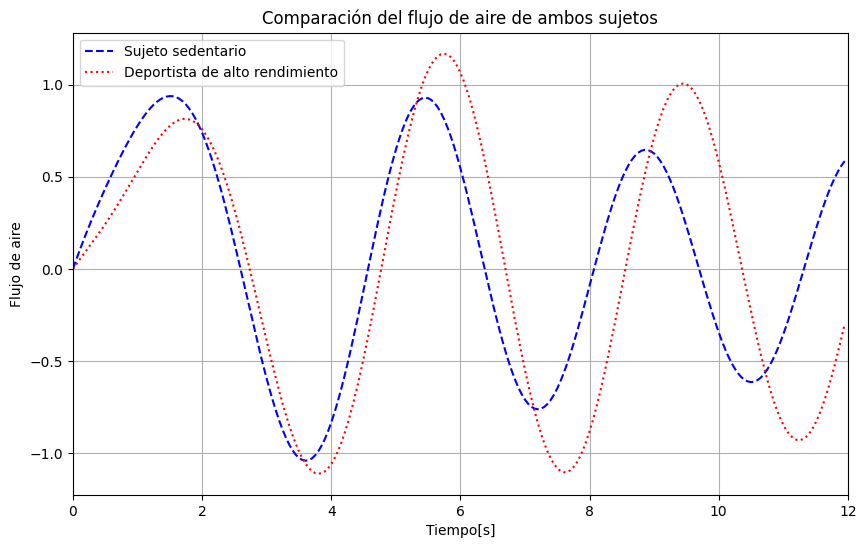

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Comparación del flujo de aire de ambos sujetos')
plt.plot(t_s, dv1_s, label='Sujeto sedentario', color='blue', linestyle='dashed')
plt.plot(t_d, dv1_d, label='Deportista de alto rendimiento', color='red', linestyle='dotted')
plt.xlabel('Tiempo[s]')
plt.xlim(start, stop)
plt.ylabel('Flujo de aire')
plt.legend()
plt.grid(True)
plt.show()

4. Se calcula el error cuadrático medio entre los flujos simulados.

In [29]:
e = []
for i in range(len(dv1_s)):
  # Se calcula la resta entre los terminos respectivos de cada sujeto
  e.append(dv1_s[i] - dv1_d[i])

# Se elevan las diferencias al cuadrado
e_2 = [value**2 for value in e]

EM = np.sum(e_2) / len(e_2)
print(f'El error cuadrático medio es: {EM}')

El error cuadrático medio es: 0.23190028525755532


5. Las diferencias en las gráficas se explica por la diferencia en la capacidad muscular de ambos sujetos en sus musculos respiratorios, lo que provoca que el deportista de alto rendimiento tenga una frecuencia respiratoria menor pero una amplitud de flujo mayor, aún cuando el sujeto sedentario tiene un flujo inicial mayor.